In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset directly from kaggle and place in our project directory.
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:05<00:00, 29.7MB/s]
100% 149M/149M [00:05<00:00, 26.8MB/s]


In [3]:
# Function to iterate through each of the MRI scans and load the metadata into a dataframe.
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path.
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory.
    if os.path.isdir(label_path):
      # Iterate through images in the label directory.
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists.
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data.
  df = pd.DataFrame({
      "Class Path": class_paths,
      "Class": classes
  })

  return df

In [4]:
# Load the metadata for the training data set and save the output.
tr_df = get_class_paths("/content/Training")

In [5]:
# Print the dataframe of training data image paths (Class Path) and tumor labels (Class).
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0923.jpg,notumor
1,/content/Training/notumor/Tr-no_0146.jpg,notumor
2,/content/Training/notumor/Tr-no_1491.jpg,notumor
3,/content/Training/notumor/Tr-no_1500.jpg,notumor
4,/content/Training/notumor/Tr-no_0363.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0237.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0783.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0557.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0968.jpg,pituitary


In [6]:
# Load the metadata for the testing data set and save the output.
ts_df = get_class_paths("/content/Testing")

In [7]:
# Print the dataframe of testing data image paths (Class Path) and tumor labels (Class).
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0305.jpg,notumor
1,/content/Testing/notumor/Te-no_0155.jpg,notumor
2,/content/Testing/notumor/Te-no_0176.jpg,notumor
3,/content/Testing/notumor/Te-no_0091.jpg,notumor
4,/content/Testing/notumor/Te-no_0346.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0072.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0104.jpg,pituitary
1308,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0275.jpg,pituitary


# Exploring the data to get a better understanding of it

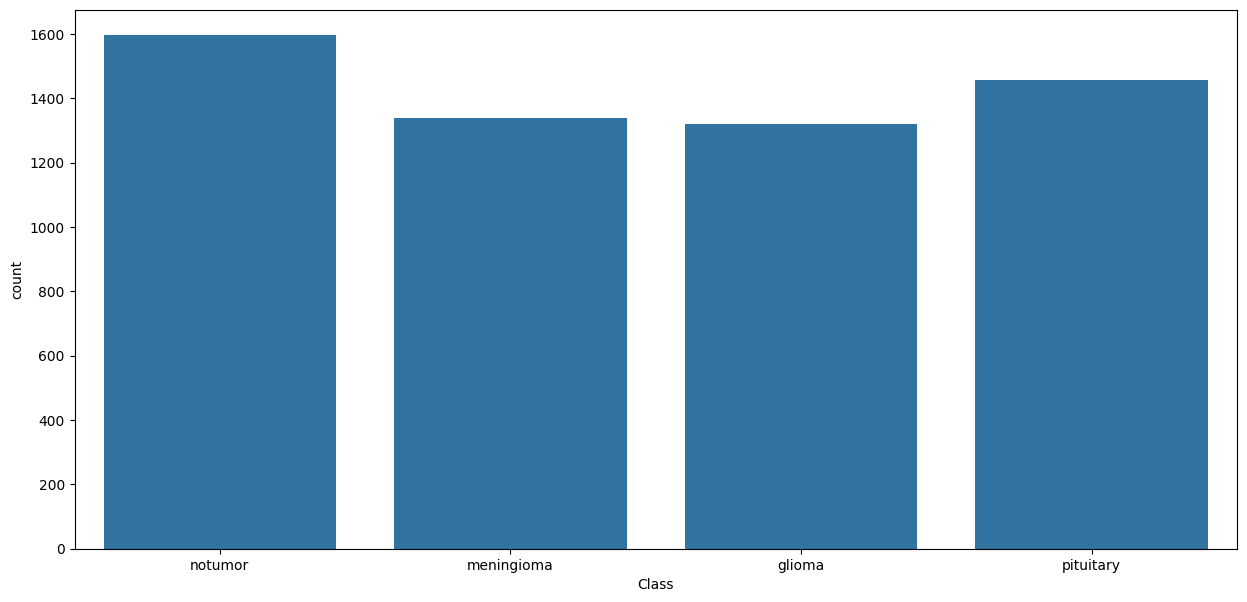

In [8]:
# Plot the different types of tumors and how many of each there are in the training data set.
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df["Class"])

We can see each class has approximately the same amount of MRI scans in the data set, making it a fairly balanced data set.

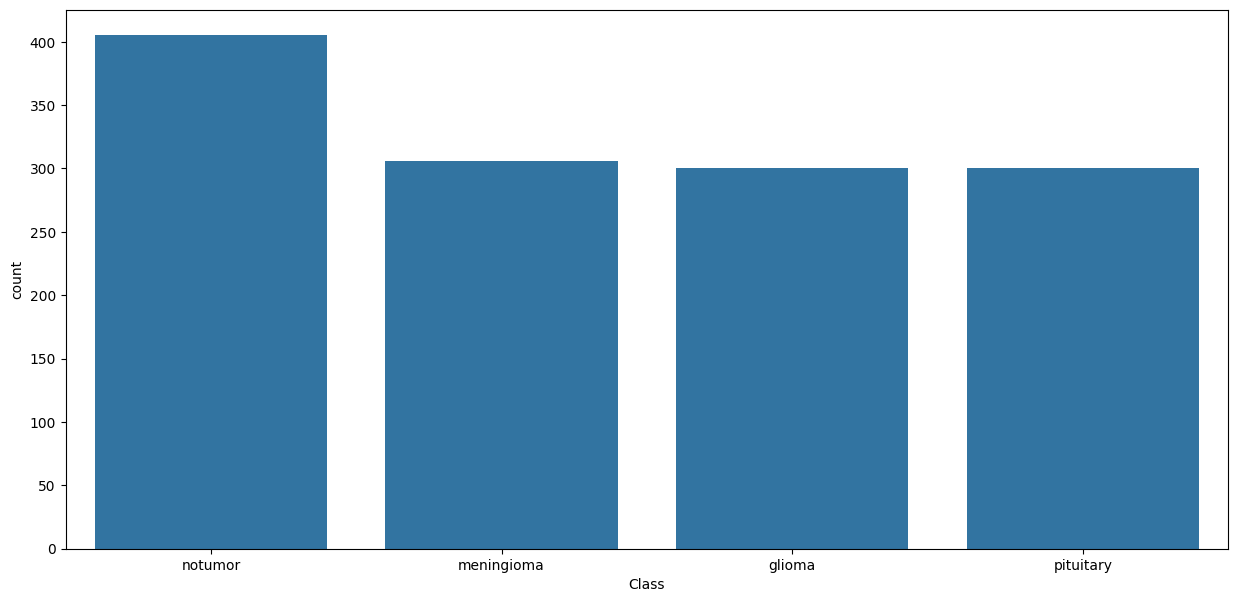

In [9]:
# Plot the different types of tumors and how many of each there are in the testing data set.
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df["Class"])

# Splitting our data into training, testing and validation data sets

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

# Sequential is a class that allows us to build a neural network model layer by layer.
# Think of it like stacking building blocks on top of each other, where each block represents a layer
# in the neural network.  This allows us to more easily understand the architecture of deep-learning
# models.
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Split the testing data set into a validation and testing set.
# Set aside some of the testing data for validation (crutial for tuning the model and preventing overfitting.)
# Stratify ensures the data is split in a way that maintains the proportionality of each class label in the original
# data set, in the training and testing sets.
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [12]:
# Print the newly created validation dataframe.
valid_df

,Class Path,Class
849,/content/Testing/glioma/Te-gl_0095.jpg,glioma
334,/content/Testing/notumor/Te-no_0384.jpg,notumor
1103,/content/Testing/pituitary/Te-pi_0241.jpg,pituitary
1279,/content/Testing/pituitary/Te-pi_0287.jpg,pituitary
722,/content/Testing/glioma/Te-gl_0097.jpg,glioma
...,...,...
72,/content/Testing/notumor/Te-no_0223.jpg,notumor
501,/content/Testing/meningioma/Te-meTr_0008.jpg,meningioma
610,/content/Testing/meningioma/Te-me_0035.jpg,meningioma
746,/content/Testing/glioma/Te-gl_0253.jpg,glioma


In [13]:
# Print the newly created testing dataframe.
ts_df

,Class Path,Class
1004,/content/Testing/glioma/Te-glTr_0007.jpg,glioma
664,/content/Testing/meningioma/Te-me_0284.jpg,meningioma
49,/content/Testing/notumor/Te-no_0296.jpg,notumor
1154,/content/Testing/pituitary/Te-pi_0035.jpg,pituitary
139,/content/Testing/notumor/Te-no_0309.jpg,notumor
...,...,...
984,/content/Testing/glioma/Te-gl_0082.jpg,glioma
345,/content/Testing/notumor/Te-no_0218.jpg,notumor
738,/content/Testing/glioma/Te-gl_0165.jpg,glioma
933,/content/Testing/glioma/Te-gl_0052.jpg,glioma


# Pre-processing the data

In [14]:
# The number of images the model will process at once.
batch_size = 32

# Set image size for all MRI scans to be resized to.
img_size = (299, 299)
# Rescale the pixels values, and randomly adjust the brightness of the images to help our model
# be more robust.
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
# For testing, only rescale the pixel values, without changing the brightness.  This is because we
# want our data to be consistent and not introduce randomness.
ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
## Use the generators to create 3 data flows: one for training, one for testing and one for validation. ##
## Take the data from the dataframes and prepare them to be fed to our deep-learning model. ##

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


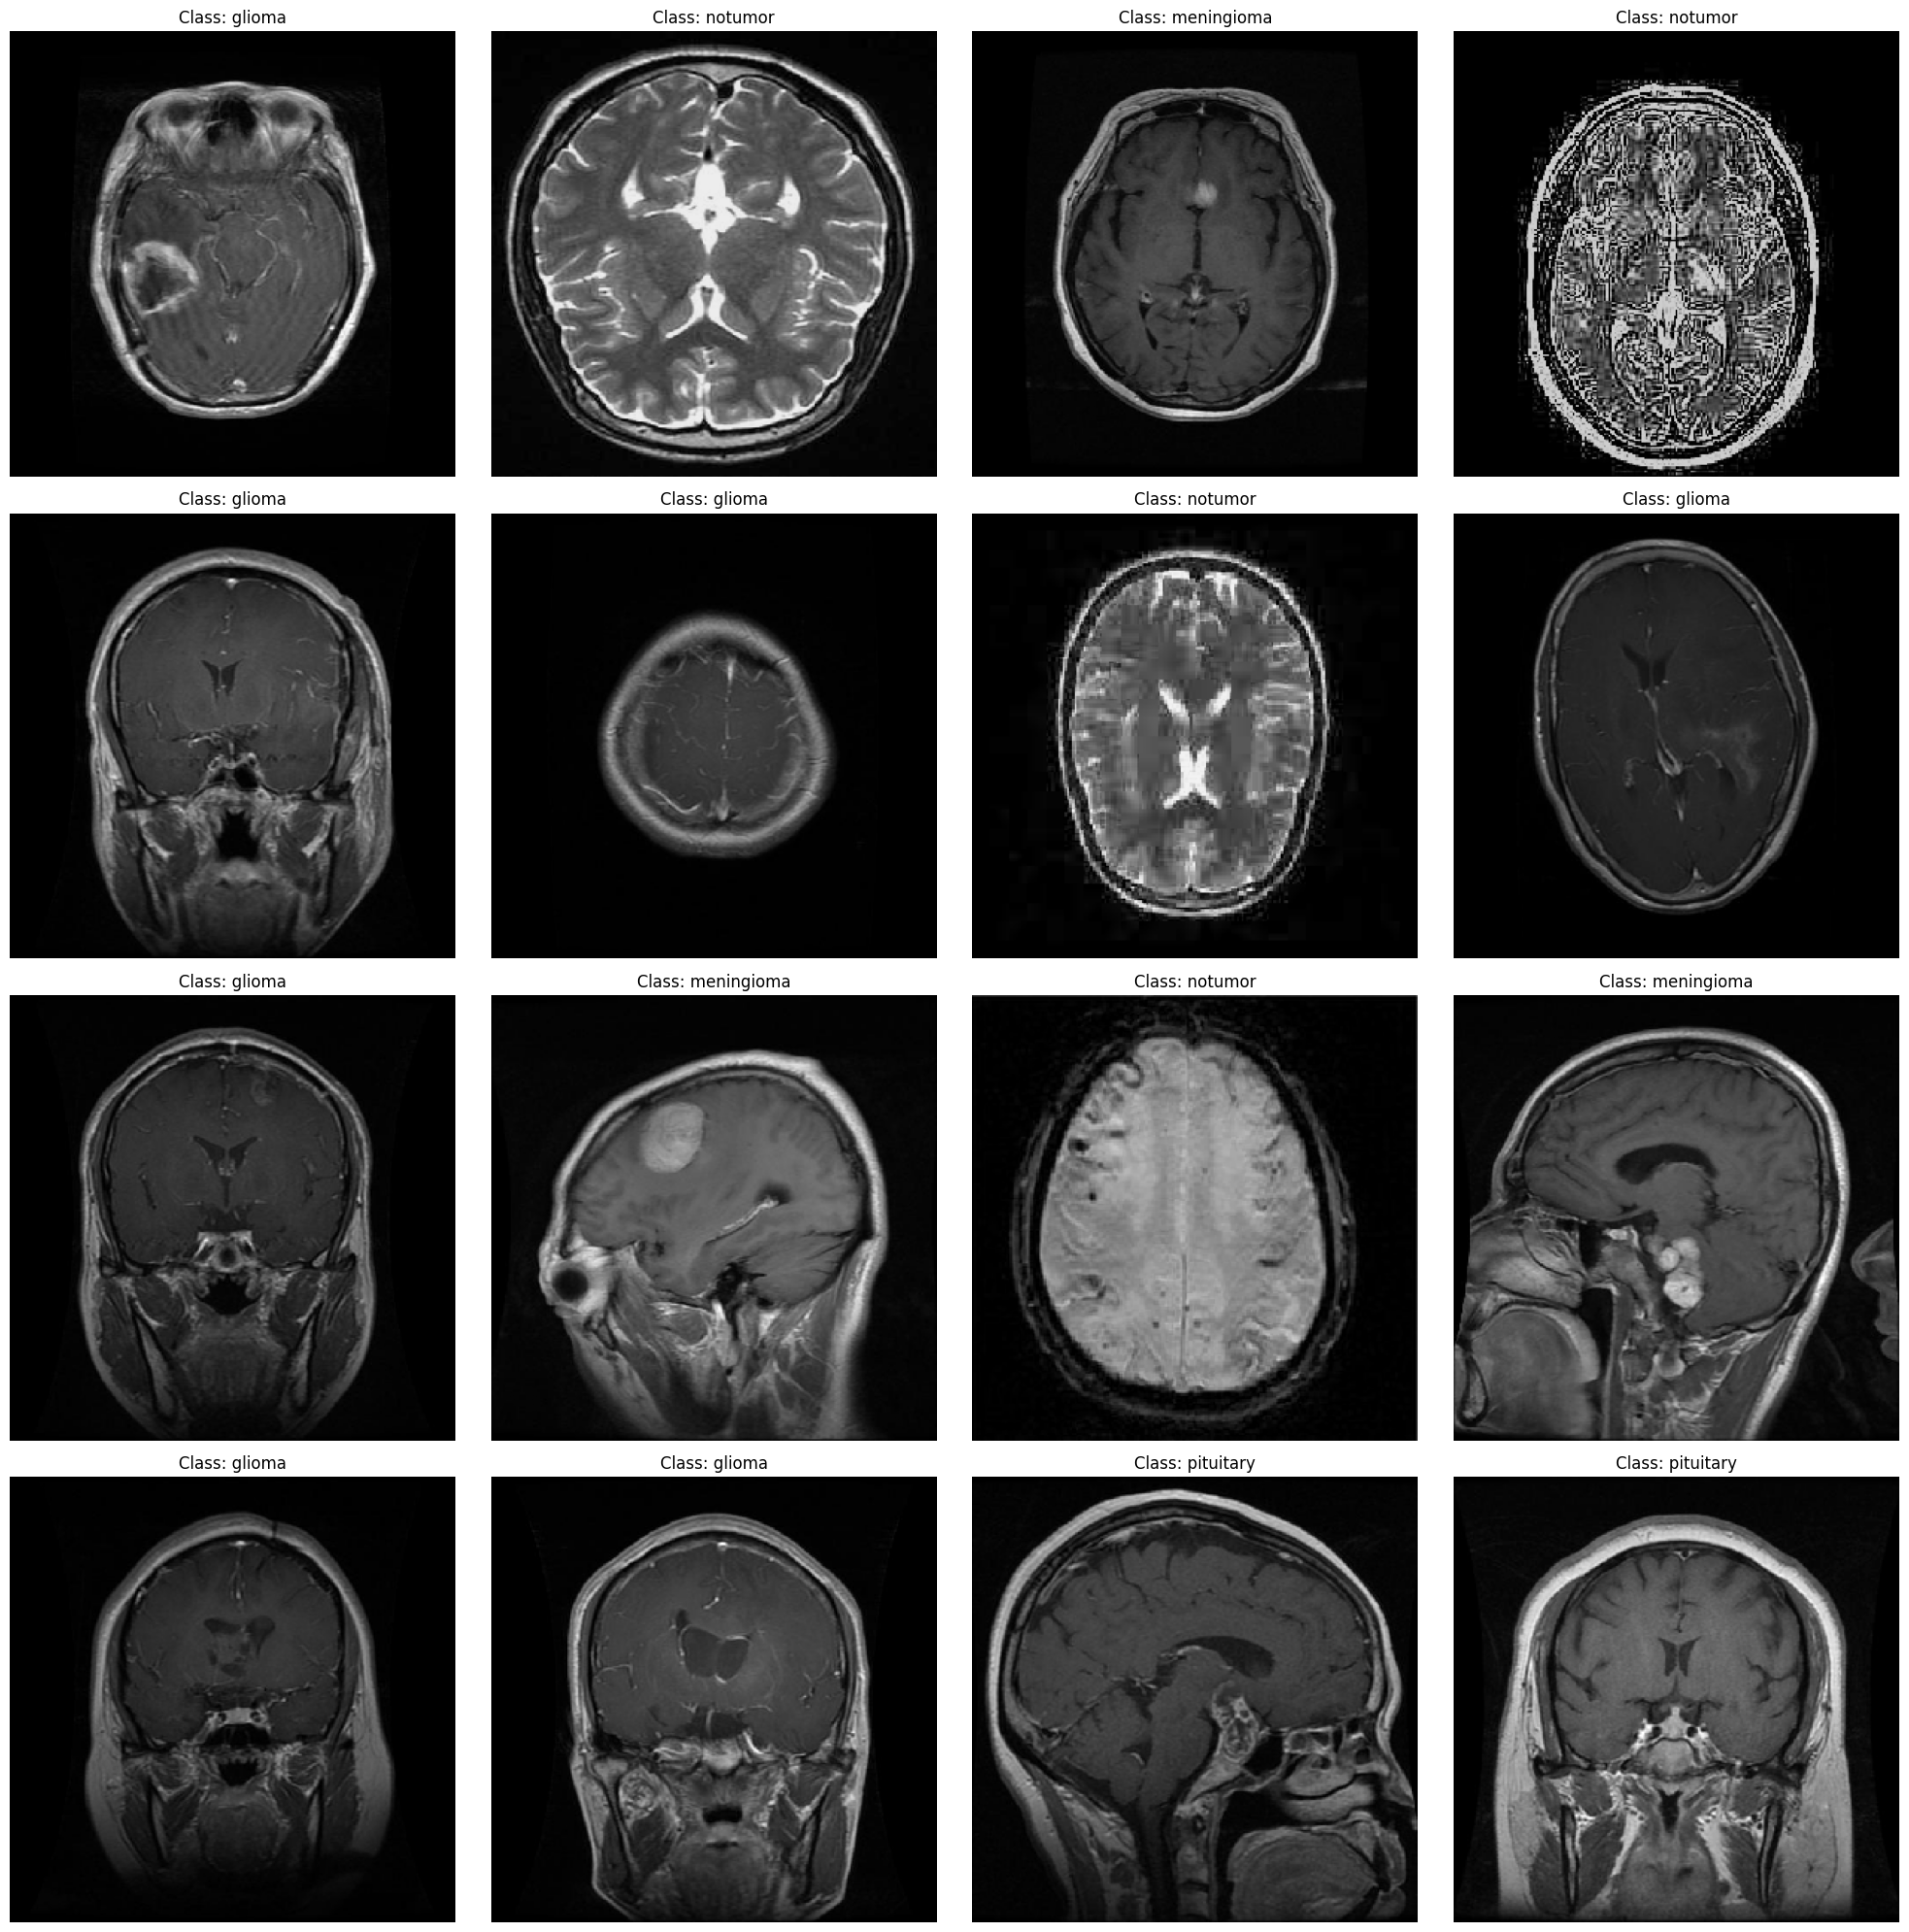

In [16]:
# Preview a few of the images in our training dataset.

plt.figure(figsize=(20, 20))

for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index.
  class_index = np.argmax(label)

  # Get the list of class names and class indices.
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices.
  index_position = class_indices.index(class_index)

  # Get the class name using the index position.
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()

# Implementing the Xception Model

In [17]:
# Define the shape of the images we're working with.
img_shape = (299, 299, 3) # 3 for 3 RGB layers

# Load the Xception model.
base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling="max")

# Define the Sequential model.
# Consists of a sequence of layers, responsible for taking the output of the Xception model and transforming it into the final predictions.
# The dropout layer is used to prevent overfitting (when the model learns the training data too well.)  It randomly drops some of the neurons to help it generalize.
# The dense layers represent the layers of 128 and 4 neurons.
model = Sequential([base_model, Flatten(), Dropout(rate=0.3), Dense(128, activation="relu"), Dropout(rate=0.25), Dense(4, activation="softmax")])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [18]:
# Compile the model.
# Adamax is an optimizer, like a smart assistant that helps the model learn during training by adjusting the size of the steps when updating its knowledge and the
# weights of the model, based on how close or far off its prediction is, and whether its headed in the right direction.
# Low learning rate means it learns more slowly, but more accurately.
model.compile(Adamax(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy", Precision(), Recall()])

In [ ]:
# Training our model.
# Pass in the training and validation generator.  5 epochs means the model will go through the entire training data set 5 times.
# After each epoch, the model will update its weights.
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

In [ ]:
# Plot graphs to visiualize the training metrics over the 5 metrics, to better understand what happened to the model during training.